<a href="https://colab.research.google.com/github/Pavan0-18/Design_project/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle


In [7]:
from google.colab import files
files.upload()  # Upload kaggle.json here
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [11]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification


Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.58G/3.58G [01:02<00:00, 127MB/s]
100% 3.58G/3.58G [01:02<00:00, 61.1MB/s]


In [13]:
!unzip fruits-fresh-and-rotten-for-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [18]:
train_data="/content/dataset/train"
test_data="/content/dataset/test"

In [23]:
# Get all image files in all subdirectories of train_dir
image_files = []
for class_dir in os.listdir(train_data):
    class_path = os.path.join(train_data, class_dir)
    if os.path.isdir(class_path):  # Check if it's a directory
        image_files.extend([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

num_files = len(image_files)
print(f"Number of files: {num_files}")

# Convert to a NumPy array and check its shape
image_files_array = np.array(image_files)
print(f"Shape of the NumPy array: {image_files_array.shape}")


Number of files: 10901
Shape of the NumPy array: (10901,)


In [21]:
print(f"Train data directory: {train_data}")


Train data directory: /content/dataset/train


In [22]:
import os

# List contents of the training directory
print(os.listdir(train_data))


['rottenbanana', 'rottenoranges', 'freshoranges', 'freshbanana', 'rottenapples', 'freshapples']


In [31]:
train_data[9]

'd'

In [35]:
image_files = [f for f in os.listdir(test_data) if os.path.isfile(os.path.join(test_data, f))]


In [37]:

for class_name in os.listdir(train_data):
    class_dir = os.path.join(train_data, class_name)
    print(f"Class: {class_name} | Contains: {len(os.listdir(class_dir))} images")


Class: rottenbanana | Contains: 2224 images
Class: rottenoranges | Contains: 1595 images
Class: freshoranges | Contains: 1466 images
Class: freshbanana | Contains: 1581 images
Class: rottenapples | Contains: 2342 images
Class: freshapples | Contains: 1693 images


In [38]:
# Initialize an empty list to hold the image paths
image_files = []

# Iterate over each class directory and collect image paths
for class_dir in os.listdir(train_data):
    class_path = os.path.join(train_data, class_dir)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            # Add only files that are images (modify extensions as needed)
            if image.endswith(('jpg', 'jpeg', 'png')):
                image_files.append(os.path.join(class_dir, image))  # Save the relative path

# Check how many images were found
print(f"Number of image files found: {len(image_files)}")


Number of image files found: 10901


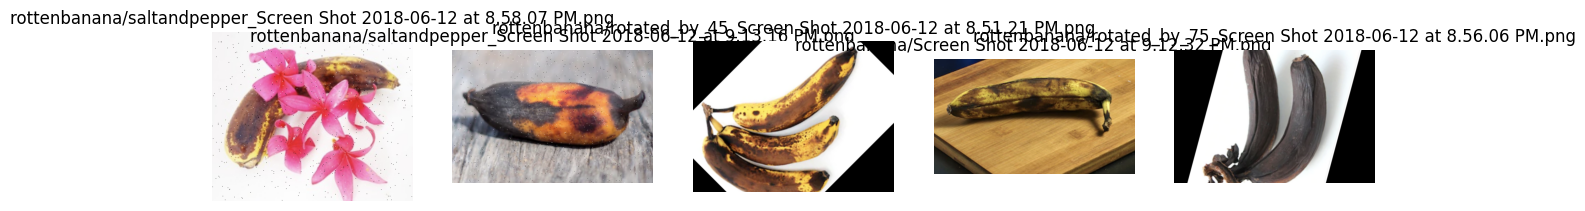

In [39]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images_from_directory(train_dir, image_files, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(image_files))):  # Ensure we don't exceed available images
        # Construct the full image path
        image_path = os.path.join(train_dir, image_files[i])  # Class path is already included

        # Check if the file exists before attempting to open it
        if os.path.exists(image_path):
            # Open image using PIL
            img = Image.open(image_path)

            # Convert image to array and plot it
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(image_files[i])  # Display image filename as title
            plt.axis("off")
        else:
            print(f"Image not found: {image_path}")

    plt.show()  # Show all images at once

# Display a few images from the dataset
display_images_from_directory(train_data, image_files, num_images=5)


In [45]:
# Count number of images per class in training data
train_class_counts = {class_name: len(os.listdir(os.path.join(train_data, class_name)))
                      for class_name in os.listdir(train_data)}

# Count number of images per class in testing data
test_class_counts = {class_name: len(os.listdir(os.path.join(test_data, class_name)))
                     for class_name in os.listdir(test_data)}

# Convert the counts to DataFrame for easier visualization
train_counts_df = pd.DataFrame(list(train_class_counts.items()), columns=["Class", "Number of Images"])
test_counts_df = pd.DataFrame(list(test_class_counts.items()), columns=["Class", "Number of Images"])

# Show the first few rows
print("Training Dataset Image Counts:")
print(train_counts_df.head())

print("\nTesting Dataset Image Counts:")
print(test_counts_df.head())

Training Dataset Image Counts:
           Class  Number of Images
0   rottenbanana              2224
1  rottenoranges              1595
2   freshoranges              1466
3    freshbanana              1581
4   rottenapples              2342

Testing Dataset Image Counts:
           Class  Number of Images
0   rottenbanana               530
1  rottenoranges               403
2   freshoranges               388
3    freshbanana               381
4   rottenapples               601


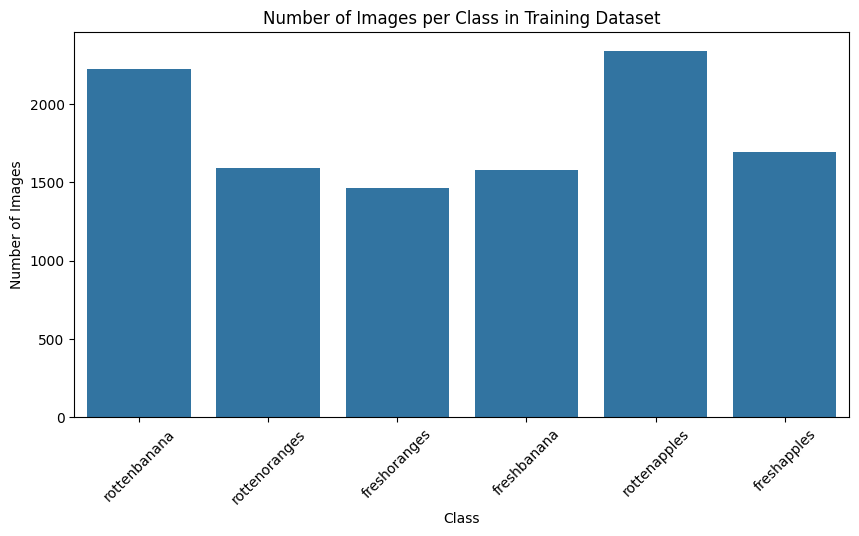

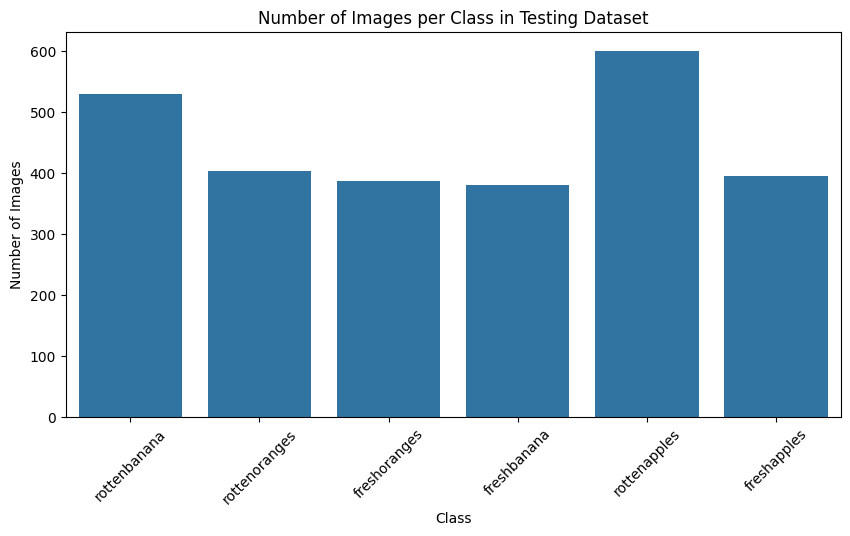

In [47]:
import seaborn as sns
# Visualize the distribution of images per class in the training dataset
plt.figure(figsize=(10, 5))
sns.barplot(x='Class', y='Number of Images', data=train_counts_df)
plt.title("Number of Images per Class in Training Dataset")
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of images per class in the testing dataset
plt.figure(figsize=(10, 5))
sns.barplot(x='Class', y='Number of Images', data=test_counts_df)
plt.title("Number of Images per Class in Testing Dataset")
plt.xticks(rotation=45)
plt.show()


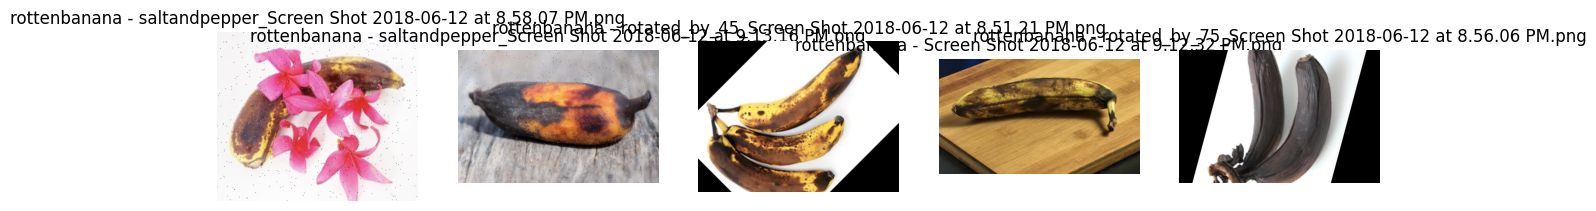

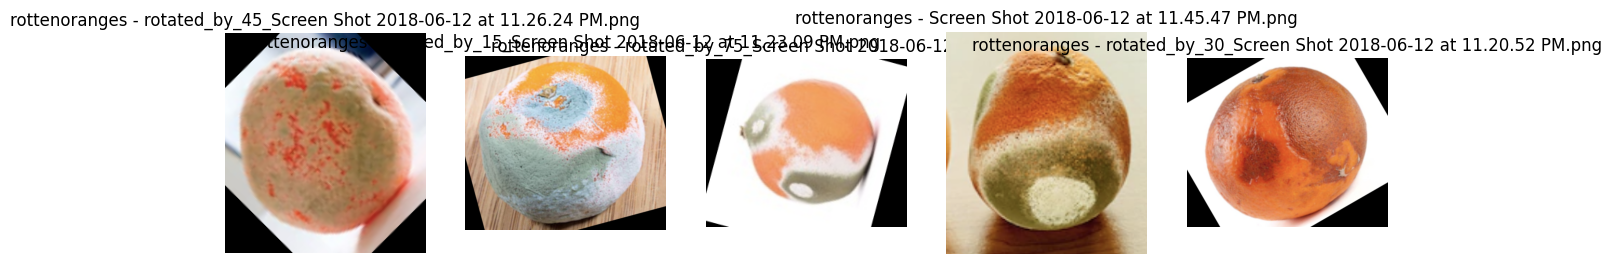

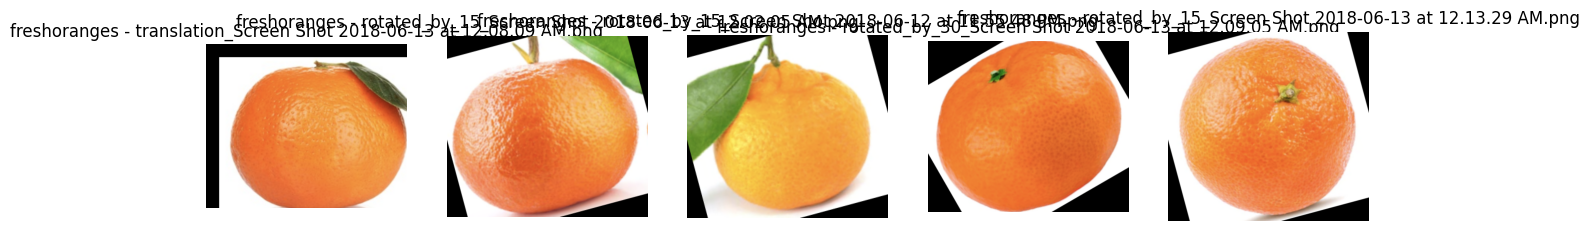

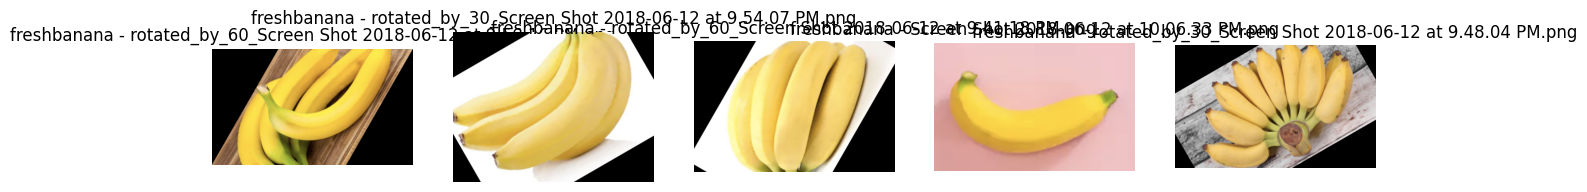

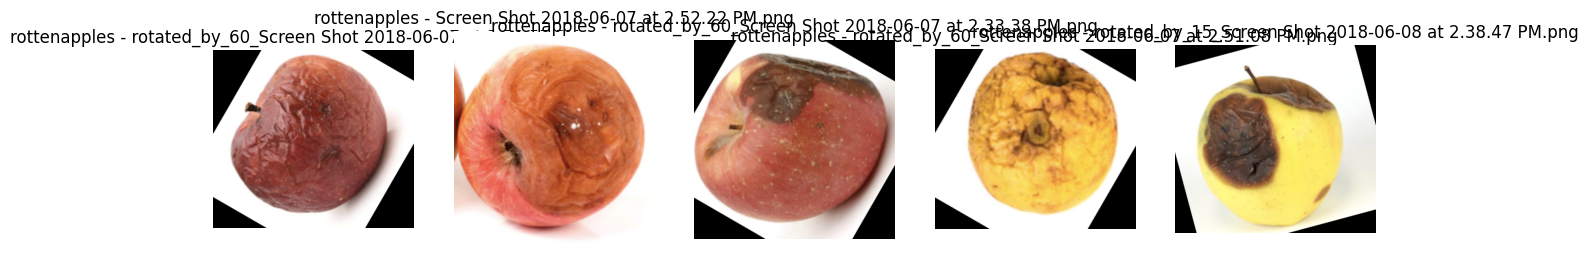

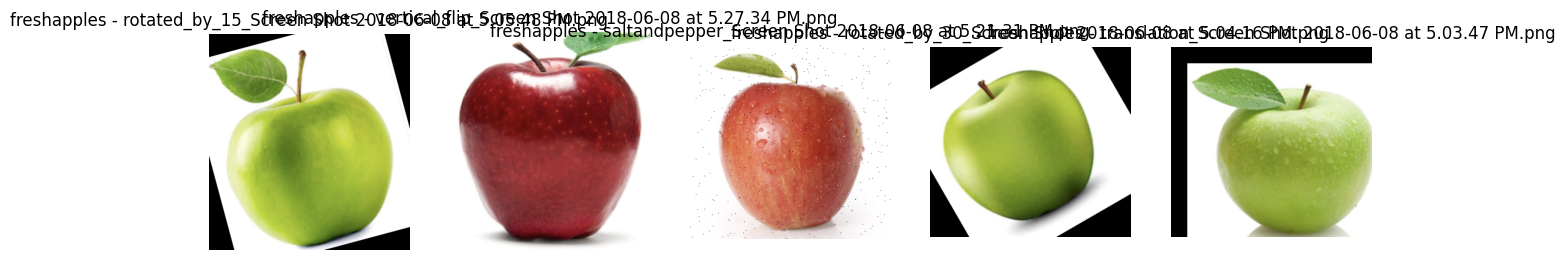

In [49]:
def display_sample_images(train_data, class_name, num_images=5):
    class_dir = os.path.join(train_data, class_name)
    image_files = os.listdir(class_dir)[:num_images]

    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"{class_name} - {image_file}")
        plt.axis("off")

    plt.show()

# Display sample images from the first class in the train folder
for class_name in os.listdir(train_data)[:6]:  # Change 3 to the number of classes you want to visualize
    display_sample_images(train_data, class_name)


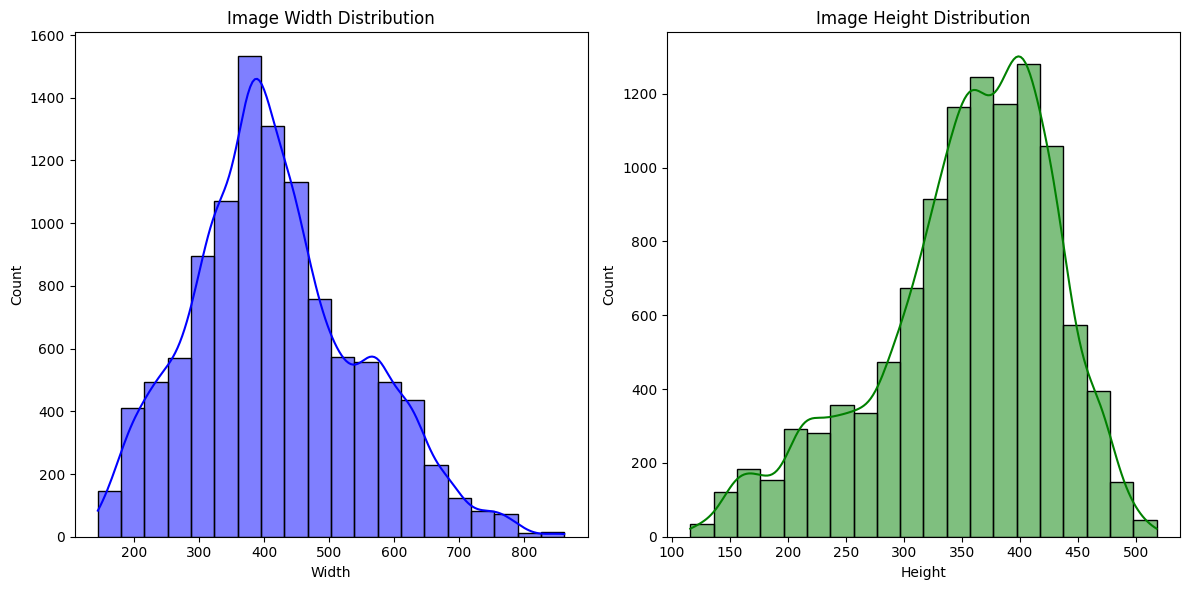

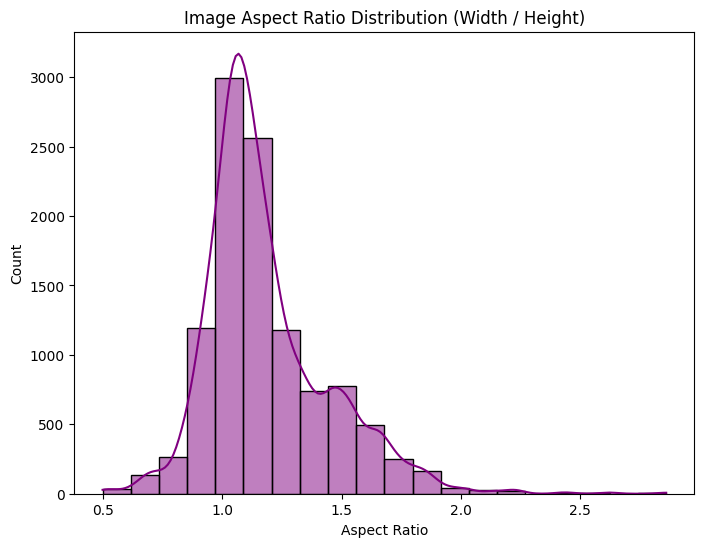

In [50]:
def analyze_image_dimensions(train_data):

    image_sizes = []
    for class_name in os.listdir(train_data):
        class_dir = os.path.join(train_data, class_name)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            img = Image.open(image_path)
            image_sizes.append(img.size)  # Collect (width, height)

    # Convert to NumPy array for easier processing
    image_sizes = np.array(image_sizes)

    # Plot distribution of image widths and heights
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(image_sizes[:, 0], bins=20, kde=True, color="blue")
    plt.title("Image Width Distribution")
    plt.xlabel("Width")

    plt.subplot(1, 2, 2)
    sns.histplot(image_sizes[:, 1], bins=20, kde=True, color="green")
    plt.title("Image Height Distribution")
    plt.xlabel("Height")

    plt.tight_layout()
    plt.show()

    # Aspect ratio analysis
    aspect_ratios = image_sizes[:, 0] / image_sizes[:, 1]
    plt.figure(figsize=(8, 6))
    sns.histplot(aspect_ratios, bins=20, kde=True, color="purple")
    plt.title("Image Aspect Ratio Distribution (Width / Height)")
    plt.xlabel("Aspect Ratio")
    plt.show()

# Analyze dimensions of images in the training dataset
analyze_image_dimensions(train_data)


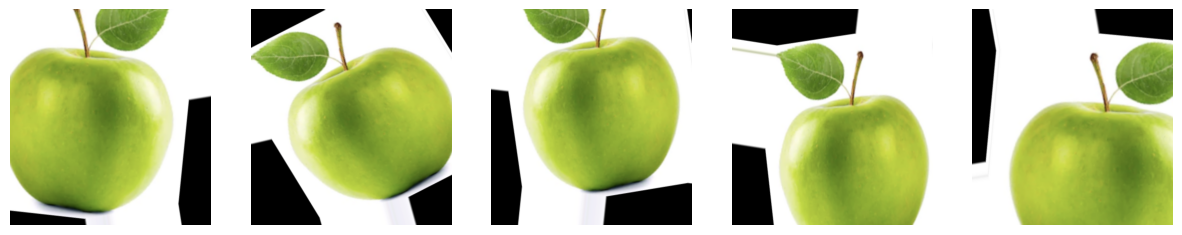

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation strategy
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Display a sample of augmented images
def display_augmented_images(train_data, class_name, num_images=5):
    class_dir = os.path.join(train_data, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    img = Image.open(image_path)
    img = np.expand_dims(np.array(img), axis=0)  # Add batch dimension for augmentation

    plt.figure(figsize=(15, 5))
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(batch[0].astype('uint8'))
        plt.axis("off")
        i += 1
        if i == num_images:
            break

    plt.show()

# Display augmented images for one class
display_augmented_images(train_data, class_name="freshapples")


In [53]:
# Model parameters
IMG_SIZE = (150, 150)  # Image dimensions (150x150)
BATCH_SIZE = 32  # Number of images processed in a batch
EPOCHS = 10  # Number of epochs for training
NUM_CLASSES = len(os.listdir(train_data))  # Number of classes

In [54]:
# Data augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values (0-255) to (0-1)
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for test/validation set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from the train directory
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [56]:
# Model architecture
from tensorflow.keras import layers, models
model = models.Sequential()

# Input layer (Conv2D + MaxPooling)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Conv2D + MaxPooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Conv2D + MaxPooling layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to convert 3D output to 1D
model.add(layers.Flatten())

# Fully connected layer (Dense)
model.add(layers.Dense(128, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


340/340 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.5201 - loss: 1.2561 - val_accuracy: 0.8627 - val_loss: 0.3999
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 482us/step - accuracy: 0.7188 - loss: 0.7050 - val_accuracy: 0.7000 - val_loss: 0.7280
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


340/340 ━━━━━━━━━━━━━━━━━━━━ 676s 2s/step - accuracy: 0.8420 - loss: 0.4422 - val_accuracy: 0.8914 - val_loss: 0.3028
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 415us/step - accuracy: 0.8750 - loss: 0.4091 - val_accuracy: 0.8000 - val_loss: 0.6322
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.8783 - loss: 0.3277 - val_accuracy: 0.8344 - val_loss: 0.4295
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 444us/step - accuracy: 0.8438 - loss: 0.4386 - val_accuracy: 0.7000 - val_loss: 0.4257
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.9039 - loss: 0.2630 - val_accuracy: 0.9457 - val_loss: 0.1475
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 611us/step - accuracy: 0.8750 - loss: 0.2896 - val_accuracy: 1.0000 - val_loss: 0.0974
Epoch 9/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 745s 2s/step - accuracy: 0.9089 - loss: 0.2368 - val_accuracy: 0.9501 - val_loss: 0.1250
Epoch 10/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 412us/step - accuracy: 0.9062 - loss: 0.2232 - val_accuracy: 